# Composite Histogram Testing

In [1]:
import sys
import seaborn.apionly as sns
from imp import reload
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
import ebtel_plot_em as ebpe
reload(ebpe)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'ebtel_plot_em' from '/home/wtb2/Documents/EBTEL_analysis/src/ebtel_plot_em.py'>

Here, we'll test the building of histograms of slope values for a whole set of heating functions or all of our sets of $T_N$ values. We will only discriminate between species and loop length $L$.

First, set some alpha values as a list of two-parameter lists of $\alpha$ and $b$ values.

In [2]:
alpha_list = [['uniform',''],['1.5',''],['1.5','-b1.0'],['1.5','-b2.0'],
              ['2.0',''],['2.0','-b1.0'],['2.0','-b2.0'],
             ['2.5',''],['2.5','-b1.0'],['2.5','-b2.0']]

Instantiate the histogram builder class.

In [3]:
histo_builder = ebpe.EMHistoBuilder('electron',40.0,100.0,alpha_list,group='by_alpha')

Now, load and format the data.

In [4]:
histo_builder.loader()

Now, build the dictionary of histogram options.

In [5]:
xkcd_cols = ['black','windows blue','medium green','fire engine red']
cp = sns.xkcd_palette(xkcd_cols)
colors = []
colors.append(cp[0])
[colors.append(cp[1]) for _ in range(3)]
[colors.append(cp[2]) for _ in range(3)]
[colors.append(cp[3]) for _ in range(3)]
styles = ['dotted'] + 3*['solid','dashdot','dashed'] 
labels = [r'$\alpha=\mathrm{uniform}$',r'$\alpha=-1.5$',r'$\alpha=-1.5$, $b=1$',r'$\alpha=-1.5$, $b=2$',
         r'$\alpha=-2.0$',r'$\alpha=-2.0$, $b=1$',r'$\alpha=-2.0$, $b=2$',
         r'$\alpha=-2.5$',r'$\alpha=-2.5$, $b=1$',r'$\alpha=-2.5$, $b=2$',]
histo_opts = {}
for i in range(len(alpha_list)):
    histo_opts[''.join(alpha_list[i])] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

Finally, build the histograms using our options specified above.

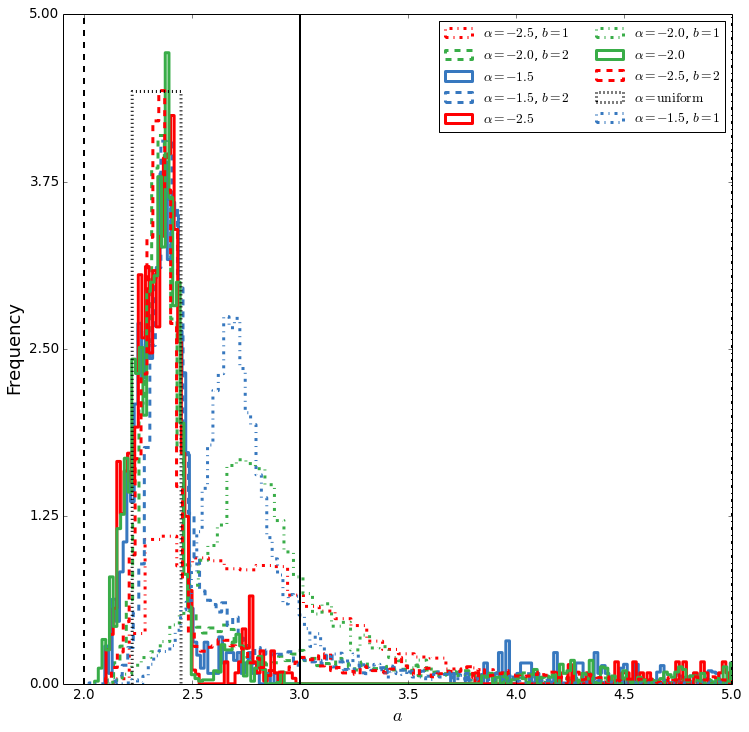

In [6]:
histo_builder.histo_maker('cool',histo_opts=histo_opts,x_limits=[1.9,5],leg_loc=1,figsize=(10,3/4*10))

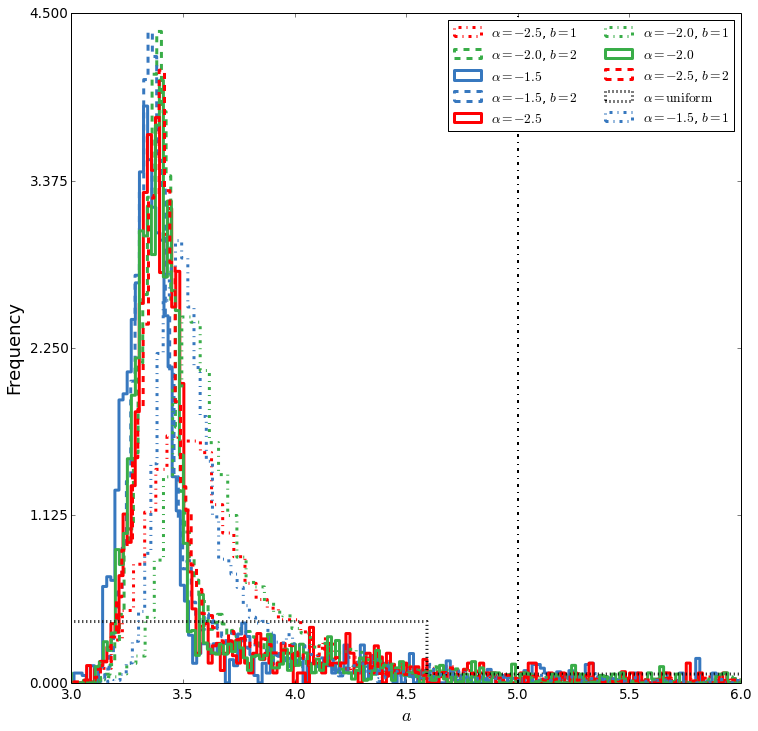

In [7]:
histo_builder.histo_maker('hot',histo_opts=histo_opts,x_limits=[3,6],leg_loc=1,figsize=(10,3/4*10))

What if we bin by $T_N$ instead?

In [8]:
histo_builder_2 = ebpe.EMHistoBuilder('electron',40.0,100.0,alpha_list,group='by_t_wait')

In [9]:
histo_builder_2.loader()

Set labels and plot options based on index of the $T_N$ value.

In [10]:
#update color palette with extra color
xkcd_cols = xkcd_cols + ['barney purple']
cp = sns.xkcd_palette(xkcd_cols)
#set colors
colors = []
for c in cp:
    [colors.append(c) for _ in range(4)]
#set styles and labels
styles = 5*['solid','dashed','dashdot','dotted'] 
labels = [r'$T_N=%d$ s'%tn for tn in np.arange(250,5250,250)]
histo_opts = {}
for i in range(len(styles)):
    histo_opts[str(i)] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

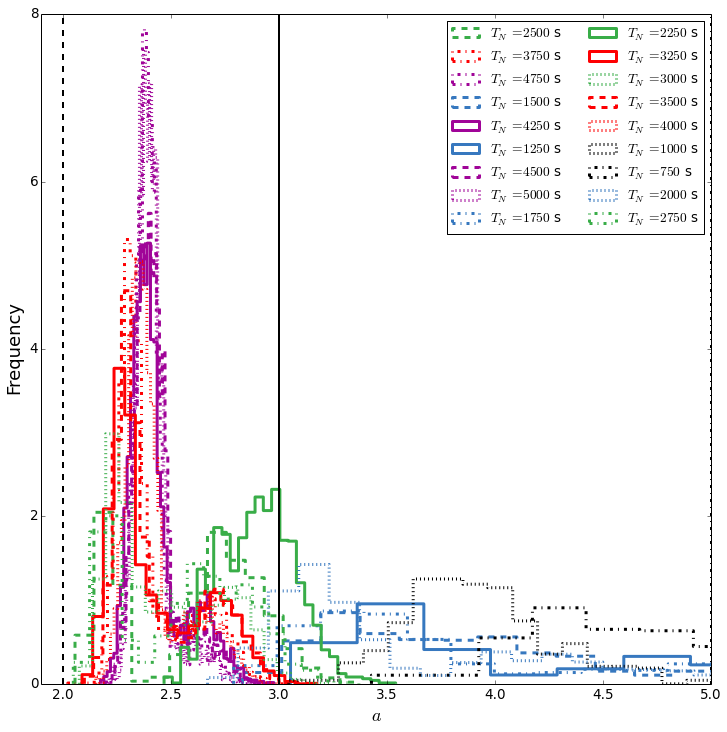

In [11]:
histo_builder_2.histo_maker('cool',histo_opts=histo_opts,leg_loc=1,x_limits=[1.9,5])

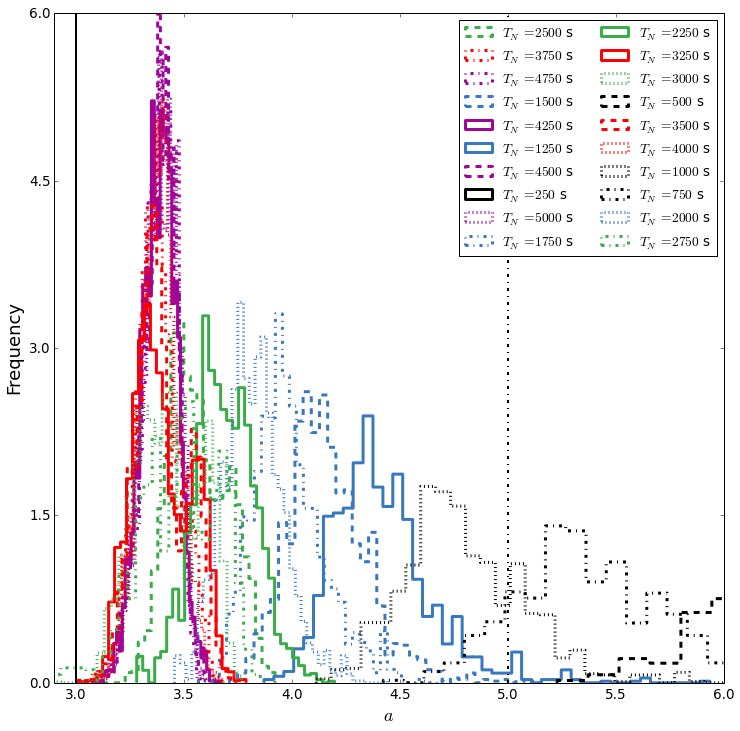

In [16]:
histo_builder_2.histo_maker('hot',histo_opts=histo_opts,leg_loc=1,x_limits=[2.9,6.0],figsize=)